In [1]:
# Program -2:Implementing Naive-bayes ,SVM using scikit-learn library on glass data set

#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, r2_score

#importing dataset
glassdf = pd.read_csv("C:\\Users\\sreev\\glass.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sreev\\glass.csv'

In [21]:
# peeking in to data
# gives the column names
glassdf.columns.values

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'],
      dtype=object)

In [22]:
#gives the unique count of Type column
glassdf.Type.value_counts()
# gives the first 5 rows of data frame
glassdf.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [23]:
# gives brief description of data
glassdf.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [24]:
# total number of null rows in a column
glassdf.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [25]:
# split the data in to train and test data frames
glassdf_x = glassdf.drop(['Type'],axis=1)
glassdf_y = glassdf['Type']
x_train,x_test,y_train,y_test=train_test_split(glassdf_x,glassdf_y,test_size=0.2,random_state=150)
print('shape of training data')
print(x_train.shape,y_train.shape)
print('*'*50)
print('shape of test data')
print(x_test.shape,y_test.shape)

shape of training data
(171, 9) (171,)
**************************************************
shape of test data
(43, 9) (43,)


In [26]:

# Finding accuracy by Naive Bayes Model

model = GaussianNB()

# Fitted the training data sets
model.fit(x_train , y_train)

# Predict method accepts one argument and predicts the label of new data set
y_pred = model.predict(x_test)

# confusion matrix is created and printed
print("confusion matrix:", confusion_matrix(y_test,y_pred))
print('*'*50)

# accuracy score is printed
print('accuracy score:',round(accuracy_score(y_test,y_pred)*100,2),'%')
print('Number of correctly classified samples:',accuracy_score(y_test, y_pred, normalize=False))
print('*'*50)

# Classification report is generated
print('classification report:',classification_report(y_test,y_pred))




confusion matrix: [[10  1  4  0  0  0]
 [ 7  3  4  0  0  1]
 [ 0  0  0  0  0  0]
 [ 0  4  0  1  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
**************************************************
accuracy score: 51.16 %
Number of correctly classified samples: 22
**************************************************
classification report:               precision    recall  f1-score   support

           1       0.59      0.67      0.62        15
           2       0.38      0.20      0.26        15
           3       0.00      0.00      0.00         0
           5       1.00      0.20      0.33         5
           6       1.00      1.00      1.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.51        43
   macro avg       0.64      0.51      0.52        43
weighted avg       0.62      0.51      0.52        43



C:\Users\sreev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Finding  Correlations
print('correlation between Ba and Type')
print(glassdf[['Ba','Type']].groupby(['Ba'],as_index=False).mean().sort_values(by ='Ba', ascending ='True'))
print('*'*50)
print('correlation between Fe and Type')
print(glassdf[['Fe','Type']].groupby(['Fe'],as_index=False).mean().sort_values(by='Fe', ascending='True'))
print('*'*50)
print('correlation between RI and Type')
print(glassdf[['RI','Type']].groupby(['RI'],as_index=False).mean().sort_values(by='RI', ascending='True'))
print('*'*50)
print('correlation between Na and Type')
print(glassdf[['Na','Type']].groupby(['Na'],as_index=False).mean().sort_values(by='Na', ascending='True'))
print('*'*50)
print('correlation between Mg and Type')
print(glassdf[['Mg','Type']].groupby(['Mg'],as_index=False).mean().sort_values(by='Mg', ascending='True'))
print('*'*50)

correlation between Ba and Type
      Ba    Type
0   0.00  2.1875
1   0.06  2.0000
2   0.09  1.5000
3   0.11  1.5000
4   0.14  2.0000
5   0.15  3.0000
6   0.24  5.0000
7   0.27  2.0000
8   0.40  7.0000
9   0.53  7.0000
10  0.54  7.0000
11  0.56  7.0000
12  0.61  7.0000
13  0.63  7.0000
14  0.64  7.0000
15  0.66  7.0000
16  0.67  7.0000
17  0.69  1.0000
18  0.76  7.0000
19  0.81  7.0000
20  1.06  7.0000
21  1.19  7.0000
22  1.38  7.0000
23  1.55  7.0000
24  1.57  7.0000
25  1.59  7.0000
26  1.63  7.0000
27  1.64  7.0000
28  1.67  7.0000
29  1.68  7.0000
30  1.71  7.0000
31  2.20  5.0000
32  2.88  7.0000
33  3.15  2.0000
**************************************************
correlation between Fe and Type
      Fe      Type
0   0.00  3.048611
1   0.01  7.000000
2   0.03  1.000000
3   0.05  7.000000
4   0.06  1.000000
5   0.07  3.000000
6   0.08  4.500000
7   0.09  3.666667
8   0.10  2.000000
9   0.11  1.000000
10  0.12  2.000000
11  0.14  1.666667
12  0.15  2.000000
13  0.16  1.000000
14  0

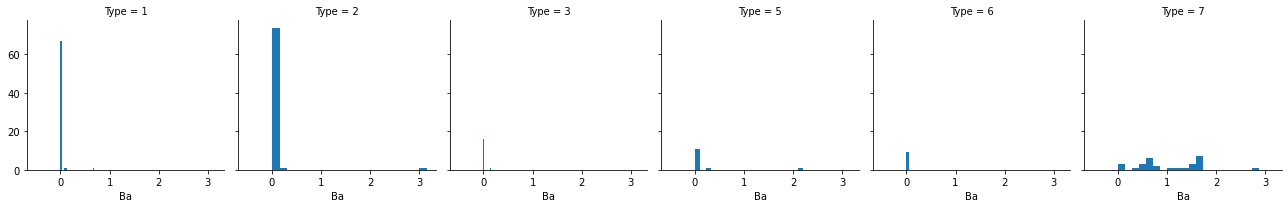

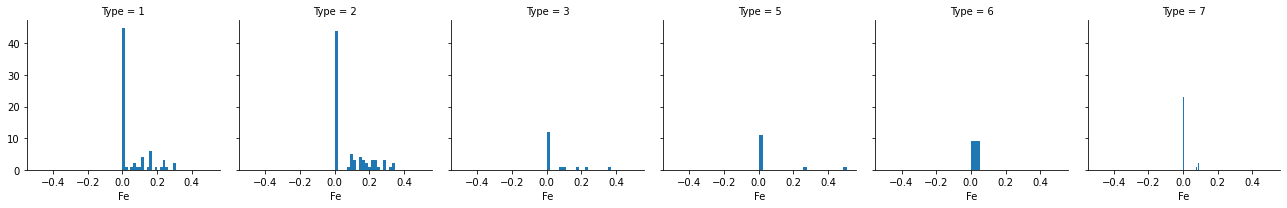

In [28]:

# Showed Visualization for atleast two columns 
g = sns.FacetGrid(glass_df, col='Type')
g.map(plt.hist, 'Ba', bins=20)

ga = sns.FacetGrid(glass_df, col='Type')
ga.map(plt.hist, 'Fe', bins=20)




In [29]:
# We could see many null values in Ba and Fe , so we can remove those and will try running Naive Bayes
glassdf_corrx = glassdf.drop(['Type','Ba','Fe'],axis=1)
glassdf_corry = glassdf['Type']
x_train,x_test,y_train,y_test=train_test_split(glassdf_corrx,glassdf_corry,test_size=0.2,random_state=150)
print('shape of training data after correlation')
print(x_train.shape,y_train.shape)
print('*'*50)
print('shape of test data after correlation')
print(x_test.shape,y_test.shape)
print('classification report after correlation:', classification_report(y_test,y_pred))



shape of training data after correlation
(171, 7) (171,)
**************************************************
shape of test data after correlation
(43, 7) (43,)
classification report after correlation:               precision    recall  f1-score   support

           1       0.59      0.67      0.62        15
           2       0.38      0.20      0.26        15
           3       0.00      0.00      0.00         0
           5       1.00      0.20      0.33         5
           6       1.00      1.00      1.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.51        43
   macro avg       0.64      0.51      0.52        43
weighted avg       0.62      0.51      0.52        43



C:\Users\sreev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
#Finding Accuracy again
model = GaussianNB()

model.fit(x_train , y_train)

y_pred = model.predict(x_test)
print("confusion matrix:", confusion_matrix(y_test,y_pred))
print('*'*50)
print('accuracy score:',round(accuracy_score(y_test,y_pred)*100,2),'%')
print('Number of correctly classified samples:',accuracy_score(y_test, y_pred, normalize=False))
print('*'*50)
print('classification report:',classification_report(y_test,y_pred))


confusion matrix: [[9 3 3 0 0 0]
 [9 3 0 1 0 2]
 [0 0 0 0 0 0]
 [0 4 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 5 1]]
**************************************************
accuracy score: 37.21 %
Number of correctly classified samples: 16
**************************************************
classification report:               precision    recall  f1-score   support

           1       0.50      0.60      0.55        15
           2       0.30      0.20      0.24        15
           3       0.00      0.00      0.00         0
           5       0.50      0.20      0.29         5
           6       0.29      1.00      0.44         2
           7       0.33      0.17      0.22         6

    accuracy                           0.37        43
   macro avg       0.32      0.36      0.29        43
weighted avg       0.40      0.37      0.36        43



C:\Users\sreev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, r2_score
# Reading data set
glass_df = pd.read_csv('glass.csv')



In [32]:
# Peeking in to data
print(glass_df.columns.values)
print(glass_df.Type.value_counts())
print(glass_df.head())
print(glass_df.describe())
print(glass_df.isnull().sum())


['RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe' 'Type']
2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500  

In [33]:
# split the data in to train and test data frames
glass_df_x = glass_df.drop(['Type'],axis = 1)
glass_df_y = glass_df['Type']

x_train,x_test,y_train,y_test = train_test_split(glass_df_x,glass_df_y,test_size = 0.2,random_state = 100)

print('Shape of training data')
print(x_train.shape,y_train.shape)
print('*'*50)
print('Shape of test data')
print(x_test.shape,y_test.shape)

Shape of training data
(171, 9) (171,)
**************************************************
Shape of test data
(43, 9) (43,)


In [34]:
#Finding accuracy using SVC model
model = SVC(kernel='linear',C=1).fit(x_train,y_train)
y_pred = model.predict(x_test)
print('confusion matrix : ' ,confusion_matrix(y_test,y_pred))
print('*'*50)
print('accuracy score :',round(accuracy_score(y_test,y_pred)*100,2),'%')
print('number of correctly classified samples: ' ,accuracy_score(y_test, y_pred, normalize=False))
print('*'*50)
print('classification report : ' ,classification_report(y_test,y_pred))

confusion matrix :  [[ 9  1  0  0  0  0]
 [ 8 11  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  0  0  4  0  1]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  4]]
**************************************************
accuracy score : 67.44 %
number of correctly classified samples:  29
**************************************************
classification report :                precision    recall  f1-score   support

           1       0.47      0.90      0.62        10
           2       0.79      0.58      0.67        19
           3       0.00      0.00      0.00         3
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         1
           7       0.80      0.80      0.80         5

    accuracy                           0.67        43
   macro avg       0.68      0.68      0.66        43
weighted avg       0.69      0.67      0.66        43



C:\Users\sreev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Displaying first 5 rows of data frame
glass_df.head()


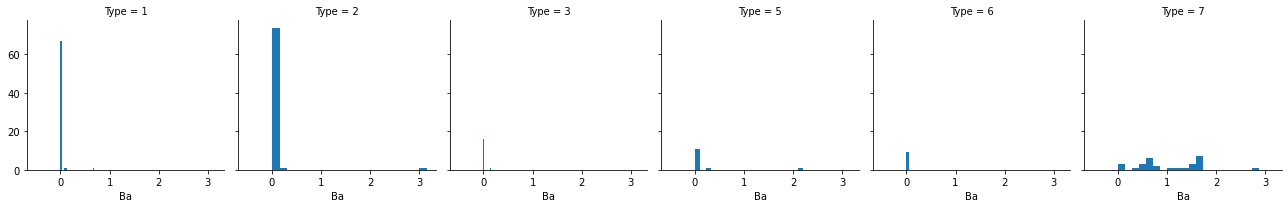

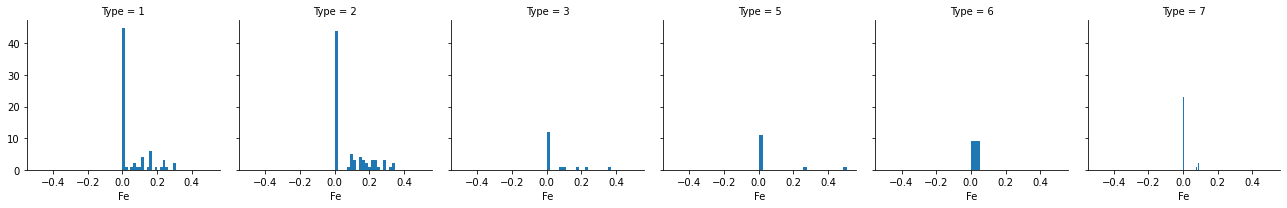

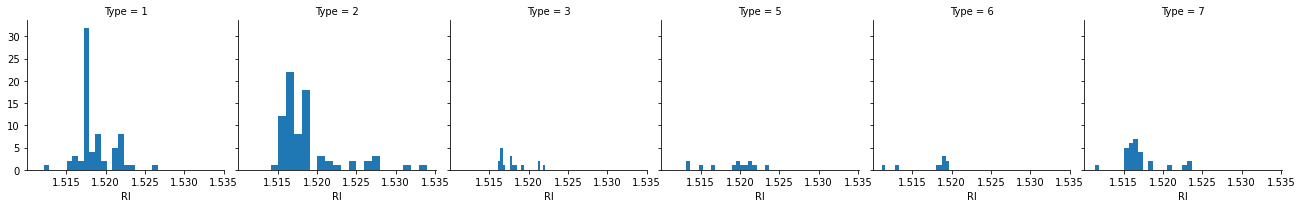

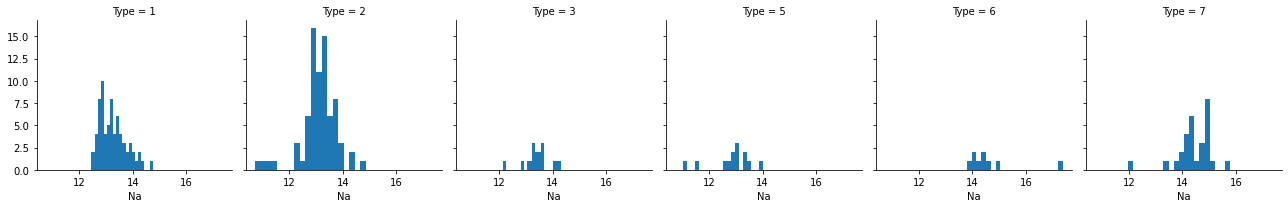

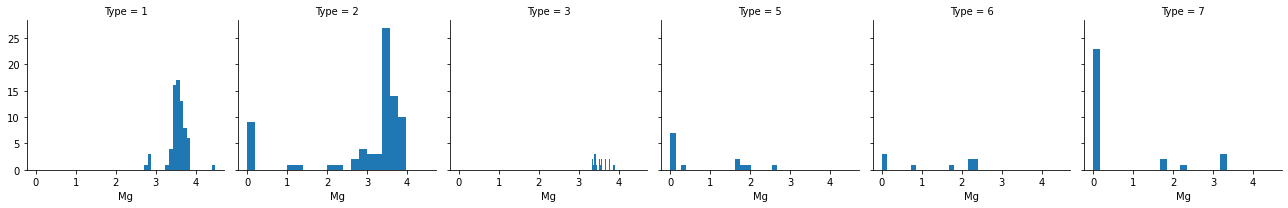

In [35]:
# Visualization of correlations between columns in data set
g = sns.FacetGrid(glass_df, col='Type')
g.map(plt.hist, 'Ba', bins=20)

ga = sns.FacetGrid(glass_df, col='Type')
ga.map(plt.hist, 'Fe', bins=20)

g = sns.FacetGrid(glass_df, col='Type')
g.map(plt.hist, 'RI', bins=20)

g = sns.FacetGrid(glass_df, col='Type')
g.map(plt.hist, 'Na', bins=20)

g = sns.FacetGrid(glass_df, col='Type')
g.map(plt.hist, 'Mg', bins=20)

In [39]:
# Performing correlation
print('Correlation between Ba and Type')
print(glass_df[['Ba','Type']].groupby(['Ba'],as_index = False).mean().sort_values(by = 'Ba', ascending = 'True'))
print('*'*50)
print('Correlation between Fe and Type')
print(glass_df[['Fe','Type']].groupby(['Fe'],as_index = False).mean().sort_values(by = 'Fe', ascending = 'True'))
print('*'*50)
print('Correlation between RI and Type')
print(glass_df[['RI','Type']].groupby(['RI'],as_index = False).mean().sort_values(by = 'RI', ascending = 'True'))
print('*'*50)
print('Correlation between Na and Type')
print(glass_df[['Na','Type']].groupby(['Na'],as_index = False).mean().sort_values(by = 'Na', ascending = 'True'))
print('*'*50)
print('Correlation between Mg and Type')
print(glass_df[['Mg','Type']].groupby(['Mg'],as_index = False).mean().sort_values(by = 'Mg', ascending = 'True'))


Correlation betwween Ba and Type
      Ba    Type
0   0.00  2.1875
1   0.06  2.0000
2   0.09  1.5000
3   0.11  1.5000
4   0.14  2.0000
5   0.15  3.0000
6   0.24  5.0000
7   0.27  2.0000
8   0.40  7.0000
9   0.53  7.0000
10  0.54  7.0000
11  0.56  7.0000
12  0.61  7.0000
13  0.63  7.0000
14  0.64  7.0000
15  0.66  7.0000
16  0.67  7.0000
17  0.69  1.0000
18  0.76  7.0000
19  0.81  7.0000
20  1.06  7.0000
21  1.19  7.0000
22  1.38  7.0000
23  1.55  7.0000
24  1.57  7.0000
25  1.59  7.0000
26  1.63  7.0000
27  1.64  7.0000
28  1.67  7.0000
29  1.68  7.0000
30  1.71  7.0000
31  2.20  5.0000
32  2.88  7.0000
33  3.15  2.0000
**************************************************
Correlation betwween Fe and Type
      Fe      Type
0   0.00  3.048611
1   0.01  7.000000
2   0.03  1.000000
3   0.05  7.000000
4   0.06  1.000000
5   0.07  3.000000
6   0.08  4.500000
7   0.09  3.666667
8   0.10  2.000000
9   0.11  1.000000
10  0.12  2.000000
11  0.14  1.666667
12  0.15  2.000000
13  0.16  1.000000
14 

In [38]:
# Dropping unnecessary columns from data set
glass_df_corr_x = glass_df.drop(['Type','Ba','Fe'],axis = 1)
glass_df_corr_y = glass_df['Type']

x_train,x_test,y_train,y_test = train_test_split(glass_df_corr_x,glass_df_corr_y,test_size = 0.2,random_state = 100)

print('Shape of training data after correlation')
print(x_train.shape,y_train.shape)
print('*'*50)
print('Shape of test data after correlation')
print(x_test.shape,y_test.shape)

Shape of training data after correlation
(171, 7) (171,)
**************************************************
Shape of test data after correlation
(43, 7) (43,)


In [40]:
# Finding accuracy again
model = SVC(kernel='linear',C=1).fit(x_train,y_train)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('confusion matrix after correlation: ' ,confusion_matrix(y_test,y_pred))
print('accuracy score after correlation:',round(accuracy_score(y_test,y_pred)*100,2),'%')
print('number of correctly classified samples: ' ,accuracy_score(y_test, y_pred, normalize=False))
print('*'*50)
print('classification report after correlation: ' ,classification_report(y_test,y_pred))

confusion matrix after correlation:  [[ 9  1  0  0  0  0]
 [ 8 11  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  1  0  3  0  1]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  4]]
accuracy score after correlation: 65.12 %
number of correctly classified samples:  28
**************************************************
classification report after correlation:                precision    recall  f1-score   support

           1       0.47      0.90      0.62        10
           2       0.73      0.58      0.65        19
           3       0.00      0.00      0.00         3
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         1
           7       0.80      0.80      0.80         5

    accuracy                           0.65        43
   macro avg       0.67      0.65      0.64        43
weighted avg       0.67      0.65      0.63        43



C:\Users\sreev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### By comparing Naive Bayes and SVM model we have Naive Bayes accuracy=37.21% and SVM accuracy = 65.12%, SVM accuracy is high and SVM is better  because Naive Bayes deals the output to a particular class (Classification) where as linear SVM tries to find a hyperplane which will maximises the margin and also has optimization function 